# Lecture 12: Introduction to Modeling

## Data 100, Fall 2020

**Fernando Perez and Suraj Rampure**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Losses

In [2]:
def l2_loss(y, yhat):
    return (y - yhat)**2

def l1_loss(y, yhat):
    return np.abs(y - yhat)

## Toy Data

In [3]:
toy = np.array([20, 21, 22, 29, 33])
single_obs = toy[0]

Let's plot the $L_2$ loss for a **single** observation. We'll plot the $L_2$ loss for the first observation; since $y_1 = 20$, we'll be plotting

$$L_2(20, \theta) = (20 - \theta)^2$$

In [4]:
thetas = np.linspace(10, 30, 1000)
l2_loss_single_obvs = l2_loss(single_obs, thetas)

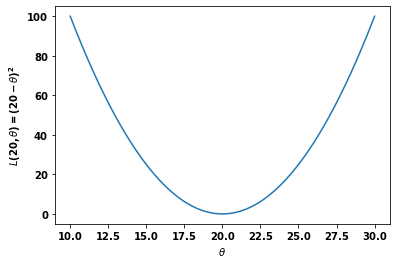

In [5]:
plt.plot(thetas, l2_loss_single_obvs);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$L(20, \theta) = (20 - \theta)^2$');
plt.savefig('l2_single_obvs.png', bbox_inches = 'tight');

We can see that the loss for a single observation is minimized by that observation itself (i.e. when $\theta = 20$, the above loss is minimized).

Let's now compute the average loss over all of our toy data.

In [6]:
def avg_loss(loss, est, data):
    return np.mean(np.array([loss(est, y_obs) for y_obs in data]), axis=0)

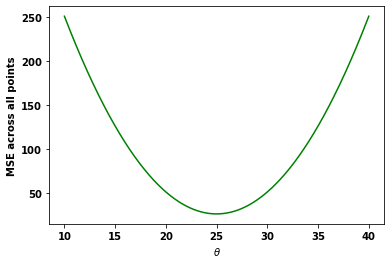

In [7]:
thetas = np.linspace(10, 40, 1000)
l2_loss_thetas = avg_loss(l2_loss, thetas, toy)

plt.plot(thetas, l2_loss_thetas, color = 'green');
plt.xlabel(r'$\theta$');
plt.ylabel(r'MSE across all points');
plt.savefig('average_l2_loss.png', bbox_inches = 'tight');

The explicit expression for the MSE here is

$$R(\theta) = \frac{1}{5} \big((20 - \theta)^2 + (21 - \theta)^2 + (22 - \theta)^2 + (29 - \theta)^2 + (33 - \theta)^2\big)$$

Note; the shape looks similar, but the minimizing value of $\theta$ is now shifted. It appears to be closer to 25 (which you may notice as the mean of[20, 21, 22, 29, 33]).

Let's now do the same, but for L1 loss. For our first observation, the $L_1$ loss is

$$L_1(20, \theta) = |20 - \theta|$$

In [8]:
thetas = np.linspace(10, 30, 1000)
l1_loss_single_obvs = l1_loss(single_obs, thetas)

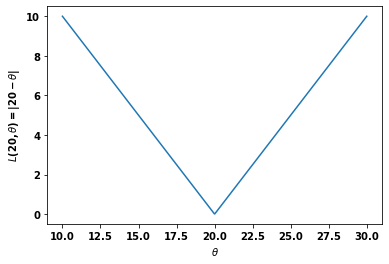

In [9]:
plt.plot(thetas, l1_loss_single_obvs);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$L(20, \theta) = |20 - \theta|$');
plt.savefig('l1_single_obvs.png', bbox_inches = 'tight');

Again this is centered on the observation itself, 20.

Averaging across all of our data:

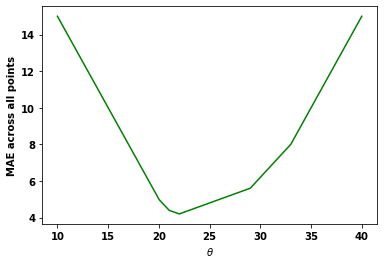

In [10]:
thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = avg_loss(l1_loss, thetas, toy)

plt.plot(thetas, l1_loss_thetas, color = 'green');
plt.xlabel(r'$\theta$');
plt.ylabel(r'MAE across all points');
plt.savefig('average_l1_loss.png', bbox_inches = 'tight');

The explicit expression for the MAE here is

$$R(\theta) = \frac{1}{5} \big(|20 - \theta| + |21 - \theta| + |22 - \theta| + |29 - \theta| + |33 - \theta|\big)$$

Note, it is pointy, and not smooth like the MSE. It also doesn't exactly look like a simple absolute value curve. It's a combination of several absolute value functions.

As we show in the lecture, the minimizing value of the MAE here is $\theta = 22$, as that is the median of our observations.

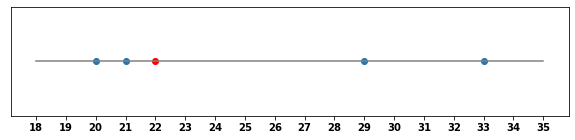

In [11]:
plt.figure(figsize = (10, 2))
plt.plot([18, 35], [5, 5], color = 'grey')
plt.scatter([20, 21, 29, 33], [5, 5, 5, 5])
plt.scatter([22], [5], color = 'red')

plt.ylim(4.5, 5.5)
plt.xticks(np.arange(18, 36, 1))
plt.yticks([]);

What if we instead had an even number of points. There wouldn't be a unique median! Let's see what happens:

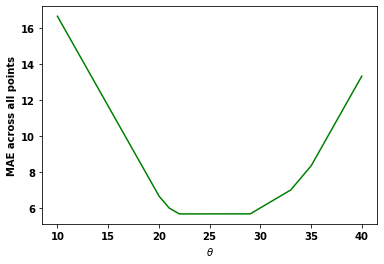

In [12]:
toy2 = np.array([20, 21, 22, 29, 33, 35])
thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = avg_loss(l1_loss, thetas, toy2)

plt.plot(thetas, l1_loss_thetas, color = 'green');
plt.xlabel(r'$\theta$');
plt.ylabel(r'MAE across all points');
plt.savefig('average_l1_loss_even.png', bbox_inches = 'tight');